In [1]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

# CliMAF: Climate Model Assessment Framework
### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Project leaders: Stéphane Sénési (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL)
##### Developers: Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL), Sylvana Ramos-Buarque (CNRM-GAME)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##### Contributors: you!

The goals of CliMAF are to provide the scientists with simplified and science-oriented means for :
- accessing both model and references data
- pre-tretament (period and geographical selections, regridding, averaging like seasonal mean computations...)
- plotting  maps, cross-sections and time series
- building  atlases
- plugging personal scripts in an atlas or in an analysis workflow
- sharing such scripts
- handlling ensembles (multi-model, multi-realization)
CliMAF provides full managment of the outputs by handling the naming of the output files; it also stores the information on "how I obtained this file" under the form of an expression called CRS (CliMAF Reference Syntax) that allows checking for the existing files and avoid recomputing the same files twice (or more).

#  
#  

# Getting started with plot()

- basic 2D map
- edit the titles
- change color palette, isolines
- change projection, add contours
- add the contours of an auxilliary file
- add a pattern
- use any ncl resource

#  

## Import climaf

In [1]:
from climaf.api import *
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

('LC debug :', False)
CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_1.2.12
python => /prodigfs/ipslfs/dods/jservon/miniconda/envs/cesmep_env/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.3.0 => /opt/ncl-6.3.0/bin/ncl


CliMAF version = 1.2.12


cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump 4.4.1.1 => /prodigfs/ipslfs/dods/jservon/miniconda/envs/cesmep_env/bin/ncdump
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


#  

## 0. Get a dataset

In [2]:
dat = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='latest',
         period='1980-2005', variable='tos', realm='ocean' )
summary(dat)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-2005,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': 'ocean',
 'root': '/bdd',
 'simulation': '',
 'table': '*',
 'variable': 'tos',
 'version': 'latest'}

#  
## 1. Basic plot

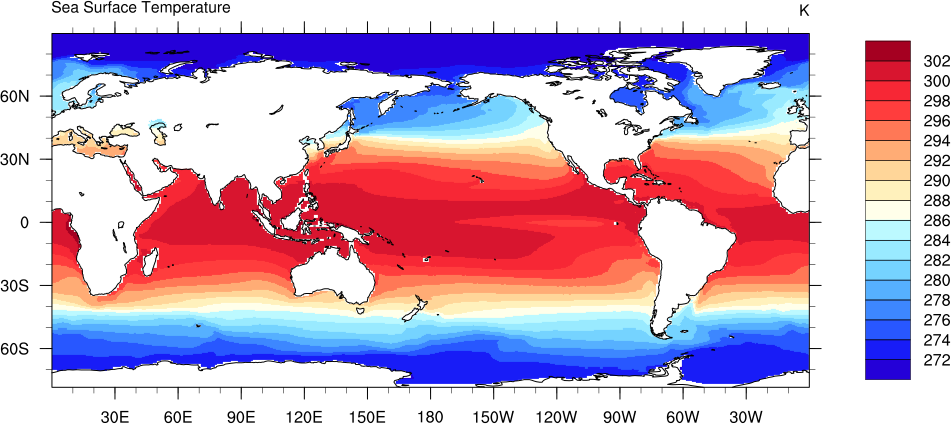

In [20]:
myplot = plot(time_average(dat))
iplot(myplot)

#  
## 2. Edit the titles

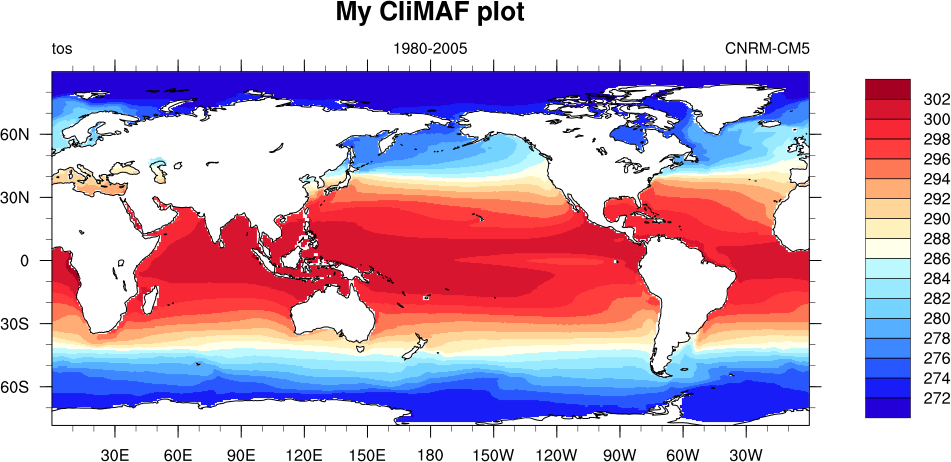

In [21]:
myplot = plot(time_average(dat),
              title='My CliMAF plot',
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model)
iplot(myplot)

#  
## 3. Change the font size

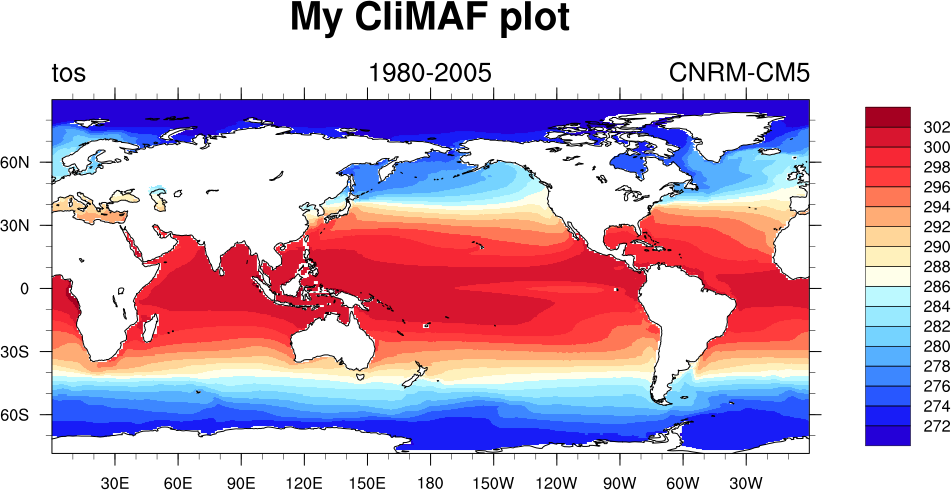

In [22]:
myplot = plot(time_average(dat),
              # -- Title
              title='My CliMAF plot',
                  tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
                  gsnStringFontHeightF=0.02, #default=0.012
              )
iplot(myplot)

### Size of the Axis labels, colorbar labels, the fonts: see http://climaf.readthedocs.org/en/dev/scripts/plot.html?highlight=plot

#  
## 4. Change the colorpalette and the isolines

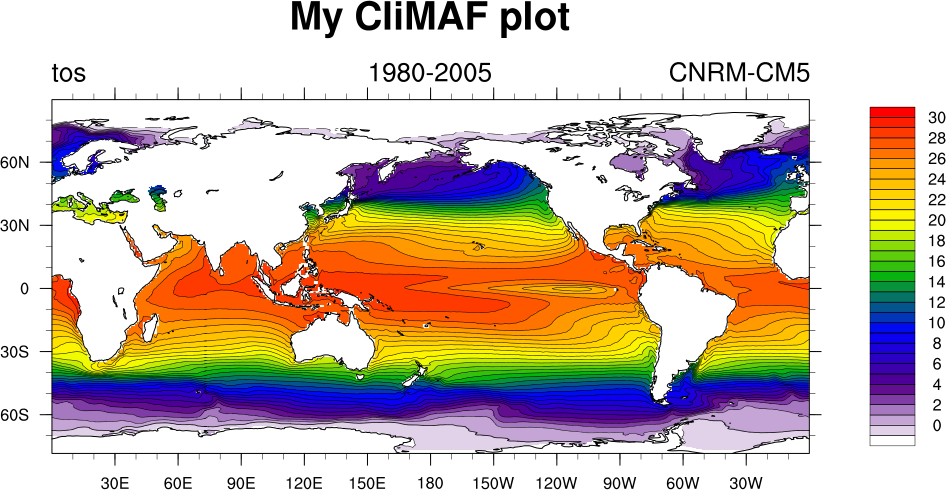

In [23]:
myplot = plot(time_average(dat),
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
                  # -- Colorpalette
                  color='WhViBlGrYeOrRe',
                  # -- Add contours
                  contours=1,
                  # -- Isolines
                  min=-1,max=30,delta=1,
                  # -- And add an offset to switch from K to degC
                  offset = -273.15
              )
iplot(myplot)

#  
## 5. Ocean view: put longitude 200°E in the center (mpCenterLonF=200), and shade the land with grey (focus='ocean')

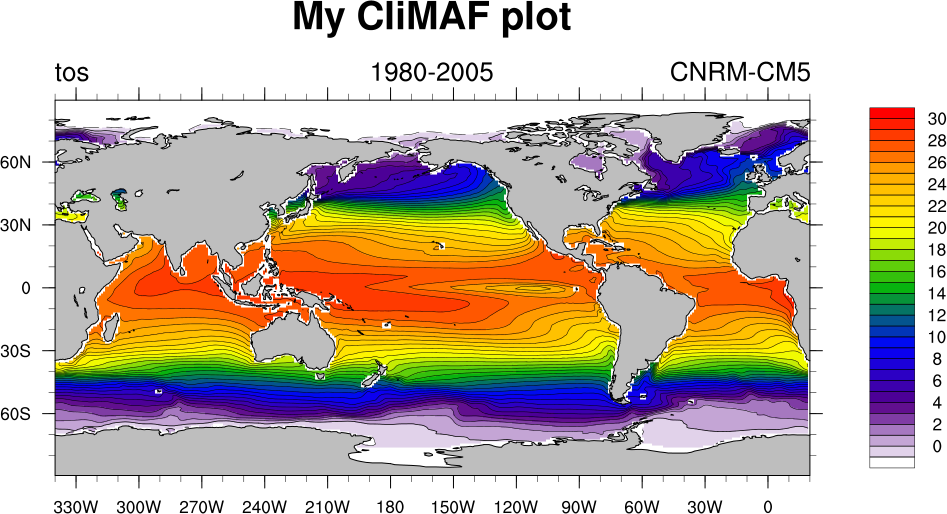

In [24]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
                  # -- Longitude in the middle of the plot
                  mpCenterLonF=200,
                  # -- Grey on lands
                  focus='ocean'
              )
iplot(myplot)

#  
## 6. options = how to use any ncl resource

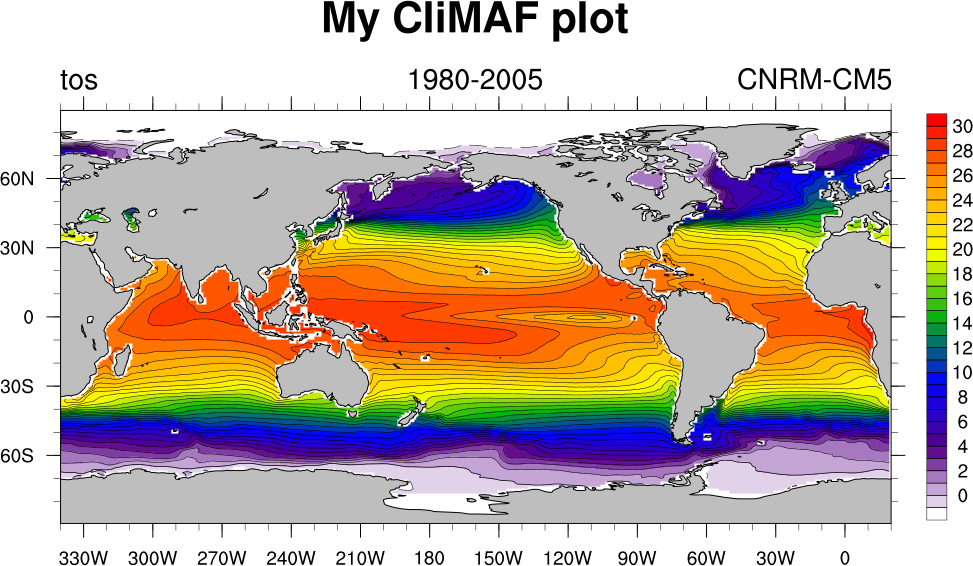

In [25]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
                  # -- OPTIONS
                  options='pmLabelBarWidthF=0.065'
                  #options='pmLabelBarWidthF=0.065|'+\
                  #        'pmLabelBarOrthogonalPosF=0.01|'+\
                  #        'lbLabelFontHeightF=0.01|'+\
                  #        'tmXBLabelFontHeightF=0.01|'+\
                  #        'tmYLLabelFontHeightF=0.01'
              )
iplot(myplot)

#  
## 7. Polar stereographic views

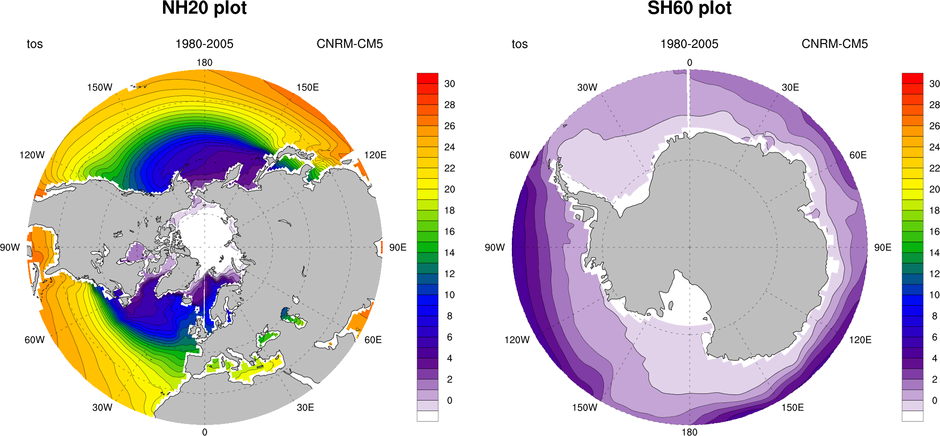

In [26]:
# --> Set proj to 'NH' or 'SH'; the two additionnal characters set the last latitude visible 

projNH = 'NH20'
myplotNH = plot(regridn(clim_average(dat,'ANM'),cdogrid='r360x180'),
              # -- Title
              title=projNH+' plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
                  # -- Northern Hemisphere projection
                  proj=projNH
              )

projSH = 'SH60'
myplotSH = plot(regridn(clim_average(dat,'ANM'),cdogrid='r360x180'),
              # -- Title
              title=projSH+' plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # or: colors='-1 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30'
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
                  # -- Northern Hemisphere projection
                  proj=projSH,
              )

iplot(cpage(fig_lines=[[myplotNH,myplotSH]]))

#  
## 8. Add the contours of an auxillary file

In [10]:
# -- Get an auxillary file
aux = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
         period='1980-2005', variable='sic')#, realm='ocean' )
summary(aux)

/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/seaIce/OImon/r1i1p1/v20130101/sic/sic_OImon_CNRM-CM5_historical_r1i1p1_185001-200512.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-2005,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': '*',
 'root': '/prodigfs/project',
 'simulation': '',
 'table': '*',
 'variable': 'sic',
 'version': 'v20130101'}

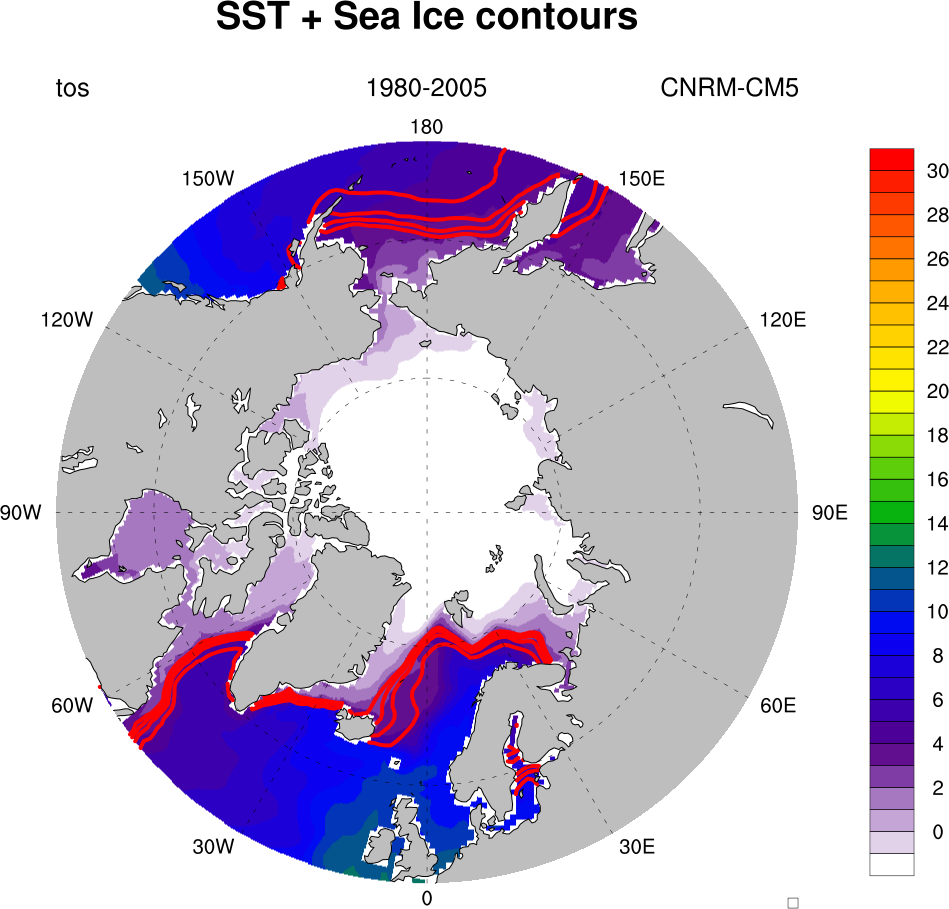

In [11]:
# --> Provide the auxillary field as a second argument
myplotNH = plot(time_average(dat),
                    # -- Auxillary field provided as a second argument
                    time_average(aux),
                    # -- Add contours
                    contours='1 5 10 15',
                    # -- Handle options on the auxillary field
                    aux_options='cnLineThicknessF=8|cnLineColor=Red',
              # -- Title
              title='SST + Sea Ice contours',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean',
              # -- Northern Hemisphere projection
              proj='NH50'
              )
iplot(myplotNH)

#  
## 9. Add the vectors of a wind field

In [21]:
tauu = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
          period='1980-2005', variable='tauuo')
tauv = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
          period='1980-2005', variable='tauvo')
summary(tauv)

/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-2005,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': '*',
 'root': '/prodigfs/project',
 'simulation': '',
 'table': '*',
 'variable': 'tauvo',
 'version': 'v20130101'}

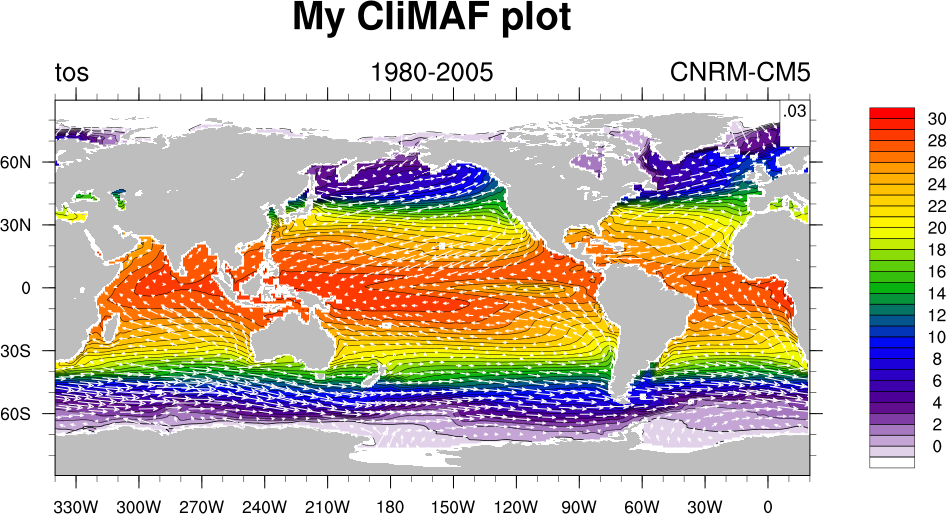

In [22]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
                  # -- Specific to the plot of wind vectors:
                  None,
                  time_average(tauu),time_average(tauv),
                  vcRefLengthF=0.005, vcRefMagnitudeF=0.03,vcMinDistanceF=0.01,vcLineArrowColor='White',
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean'
              )
iplot(myplot)

#  
## 10. Add a pattern

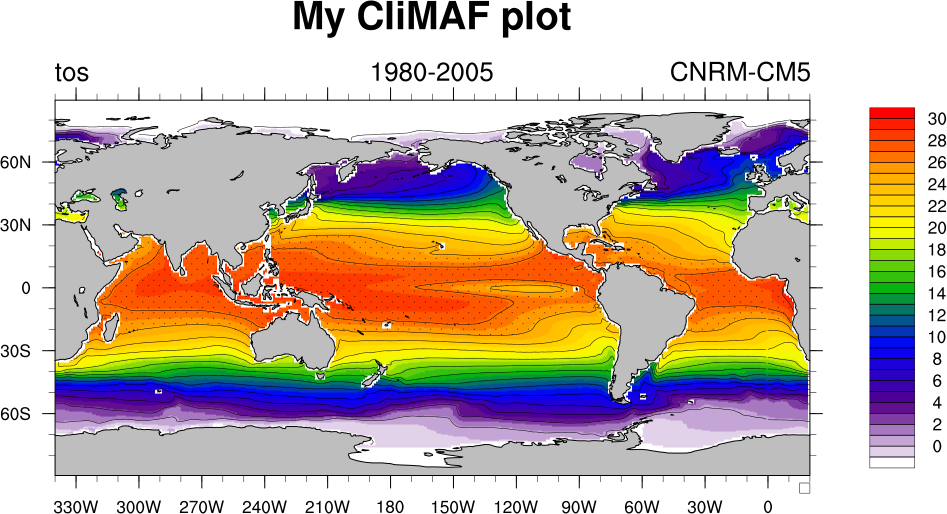

In [24]:
myplot = plot(regridn(time_average(dat),cdogrid='r360x180'),
                  # -- Pattern
                  regridn(time_average(dat),cdogrid='r360x180'),
                  shade_above = 298,
                  #shade_below = 5,
                  #offset_aux = -273.15,
                  #shading_options='gsnShadeHigh=6',
                  # https://www.ncl.ucar.edu/Document/Graphics/Images/fillpatterns.png
              # -- Title
              title='My CliMAF plot',
              tiMainFontHeightF=0.03,#default = 0.025
              # -- Subtitles
              gsnLeftString=dat.variable,
              gsnCenterString=dat.period,
              gsnRightString=dat.model,
              gsnStringFontHeightF=0.02, #default=0.012
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add contours
              #contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Longitude in the middle of the plot
              mpCenterLonF=200,
              # -- Grey on lands
              focus='ocean'
              )
iplot(myplot)

#  
## 11. Plot a region on an ORCA grid: need to regrid first on a regular grid!

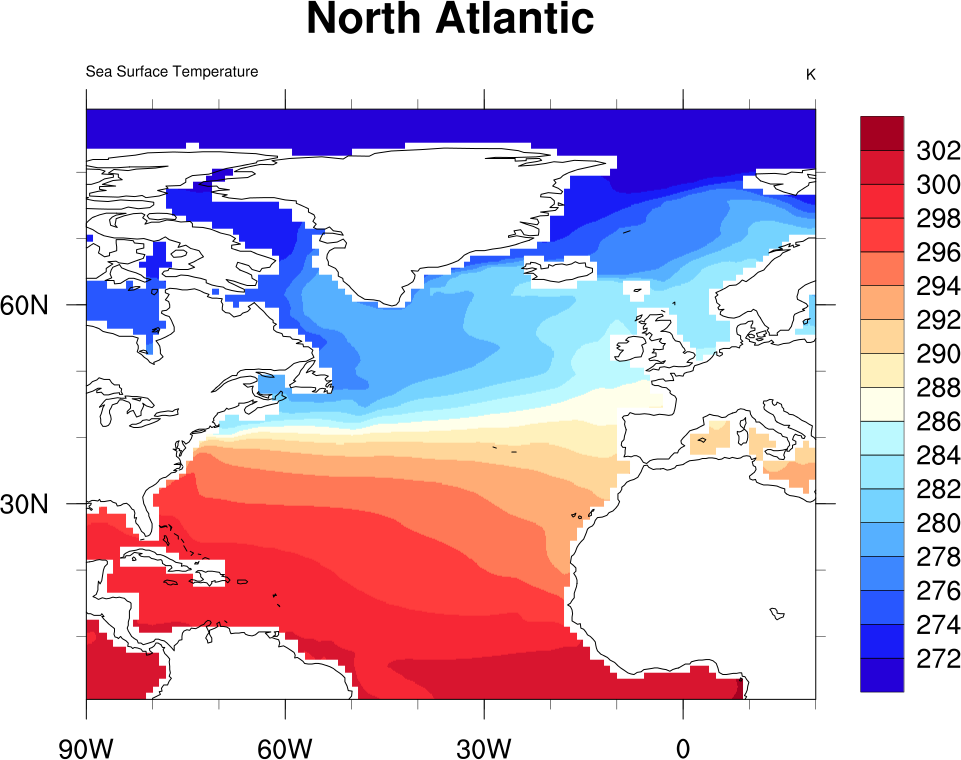

In [25]:
rgrd_dat = regridn(time_average(dat),cdogrid='r360x180')
myplot = plot(llbox(rgrd_dat,lonmin=-90,lonmax=20,latmin=0,latmax=90), title='North Atlantic')

iplot(myplot)

#  
## 12. Zonal mean atmospheric field

In [26]:
# -- A zonal field
## Add the contours of an auxillary file
ua_dat = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='latest',
            period='1980-2005', variable='ua')#, realm='ocean' )
summary(ua_dat)

/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/atmos/Amon/r1i1p1/latest/ua/ua_Amon_CNRM-CM5_historical_r1i1p1_195001-200512.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-2005,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': '*',
 'root': '/prodigfs/project',
 'simulation': '',
 'table': '*',
 'variable': 'ua',
 'version': 'latest'}

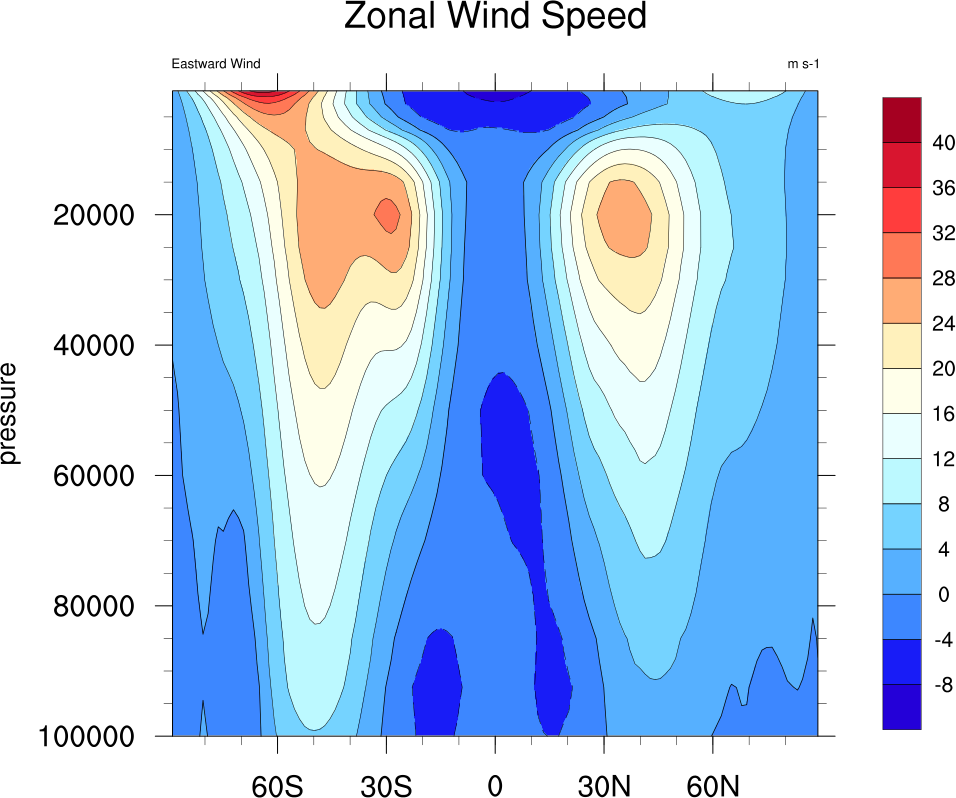

In [27]:
zonmean_plot = plot(zonmean(clim_average(ua_dat,'ANM')),title='Zonal Wind Speed',contours=1,y='lin')
iplot(zonmean_plot)

## Questions?
### -> https://climaf.readthedocs.io/en/master/scripts/plot.html
### -> climaf@meteo.fr